In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#read the csv file
dataset = pd.read_csv("ResumeFictional.csv")

In [3]:
#assigning datasets as independent and dependent variables
x=dataset.iloc[:,0:7].values
y=dataset.iloc[:,7:8].values

In [4]:
dataset.head()

,Age(years),C1,Professional Experience,Skills,Highest Qualificaton Percentage,12th Percentage,10th Percentage,Score
0,20,2,1,3,75,67,78,0
1,22,3,2,4,65,77,55,1
2,20,4,0,5,68,34,65,0
3,18,3,0,2,75,89,76,0
4,19,2,0,3,65,90,81,0


In [5]:
#check for empty values
dataset.isnull().any()

Age(years)                         False
C1                                 False
Professional Experience            False
Skills                             False
Highest Qualificaton Percentage    False
12th Percentage                    False
10th Percentage                    False
Score                              False
dtype: bool

In [6]:
#dividing the data into test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)


In [7]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

C:\Users\Munawar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Munawar\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [8]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_pred,y_test)


In [9]:
cm

array([[14,  9],
       [ 1,  1]], dtype=int64)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.93      0.74        15
           1       0.50      0.10      0.17        10

   micro avg       0.60      0.60      0.60        25
   macro avg       0.55      0.52      0.45        25
weighted avg       0.57      0.60      0.51        25



In [12]:
# Visualising the Training set results
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)


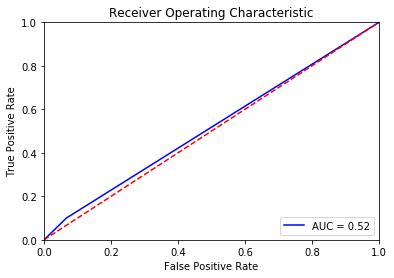

In [13]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
y_pred = classifier.predict(x_test)
cm=confusion_matrix(y_pred,y_test)

In [16]:
cm

array([[8, 4],
       [7, 6]], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.56

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59        15
           1       0.46      0.60      0.52        10

   micro avg       0.56      0.56      0.56        25
   macro avg       0.56      0.57      0.56        25
weighted avg       0.58      0.56      0.56        25



In [19]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\Munawar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Munawar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
y_pred = logisticRegr.predict(x_test)
cm=confusion_matrix(y_pred,y_test)

In [21]:
cm

array([[12,  4],
       [ 3,  6]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.72

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.67      0.60      0.63        10

   micro avg       0.72      0.72      0.72        25
   macro avg       0.71      0.70      0.70        25
weighted avg       0.72      0.72      0.72        25



In [24]:
ypred1=logisticRegr.predict([[20,2,1,3,75,67,78]])

In [25]:
ypred1

array([0], dtype=int64)

In [26]:
ypred2 = logisticRegr.predict([[22,3,2,4,65,77,55]])

In [27]:
ypred2

array([1], dtype=int64)